In [173]:
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Sample

In [11]:
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.',
    'Two representations of part of the crystal lattice of the ionic compound sodium chloride.',
    'In this diagram of the valence structure of water, the two hydrogen atoms (white) form a V-shape with a central oxygen atom (red)']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings1
corpus_embeddings = model.encode(sentences, convert_to_tensor=True)

In [13]:
# Query sentences:
queries = ['Each oxygen atom also has two lone pairs (non-bonding pairs) of electrons that contribute to the molecule’s shape.']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(sentences))
for query in queries:
    query_embedding = model.encode(query, convert_to_tensor=True)
    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(sentences[idx], "(Score: {:.4f})".format(score))






Query: Each oxygen atom also has two lone pairs (non-bonding pairs) of electrons that contribute to the molecule’s shape.

Top 5 most similar sentences in corpus:
In this diagram of the valence structure of water, the two hydrogen atoms (white) form a V-shape with a central oxygen atom (red) (Score: 0.5866)
Two representations of part of the crystal lattice of the ionic compound sodium chloride. (Score: 0.2756)
This framework generates embeddings for each input sentence (Score: 0.1161)
Sentences are passed as a list of string. (Score: 0.0662)
The quick brown fox jumps over the lazy dog. (Score: 0.0175)


## Framework

In [202]:
DATA_DIR = '../data/'
SOURCE = 'chem_jc_11/'

In [203]:
column_formats = {'id': str}
data = pd.read_csv(DATA_DIR + SOURCE + 'meta.csv', dtype=column_formats)
data.fillna('', inplace=True)
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '../data/chem_jc_11/meta.csv'

In [204]:
data['combined'] = data['description'] + '. ' + data['context']
corpus = data['combined'].to_list()
ids = data['id'].to_list()

In [193]:
image_dir = DATA_DIR + SOURCE +'images/'
                
def display_diag(_id, ext='.png'):
    img = mpimg.imread(image_dir + _id + ext)
    imgplot = plt.imshow(img)
    plt.show()

In [194]:
# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
def get_top_k(fig_ids, corpus, queries, k=3):
    corpus_embeddings = model.encode(corpus, convert_to_tensor=True)
    top_k = min(k, len(corpus))
    for query in queries:
        query_embedding = model.encode(query, convert_to_tensor=True)
        # We use cosine-similarity and torch.topk to find the highest 5 scores
        cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
        top_results = torch.topk(cos_scores, k=top_k)
        print()
        print("\n\n======================\n\n")
        print("Query:", query)
        print()
        print(f"\nTop {k} most similar sentences in corpus:")

        for score, idx in zip(top_results[0], top_results[1]):
            display_diag(fig_ids[idx])
            print("\n" + f"score : {score}" + "\n" + corpus[idx])







Query: Travel of light


Top 3 most similar sentences in corpus:


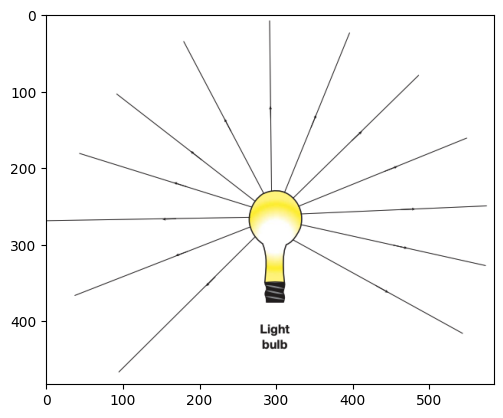


score : 0.445455938577652
Rays are straight lines indicating light propagating
from a light source. The further they are apart, the dimmer the light.. In this topic we will discuss the ray
model for light. The ray model makes
use of the fact that light travels in
straight lines in uniform media. Rays
are arrows drawn from a light source,
as shown in figure 20.2. The direction
of light moving out from its source is
called the direction of propagation.
Objects that emit light are called
luminous objects. They include
the Sun, the stars, light globes,
computer screens (when switched
on), lit candles and glow worms.
Light propagates away from luminous
objects. Luminous objects shine even
when there is no other light source.
Luminous objects that produce light as
a result of being hot are described as
incandescent.


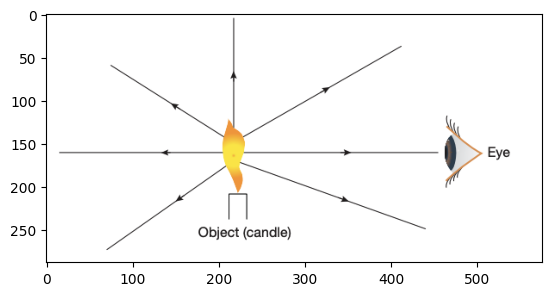


score : 0.34170758724212646
Light radiating from a flame with some
entering an eye. We can see luminous objects because the
light from them directly enters our eyes.
We draw rays from the luminous object
to the retinas of our eyes, through the iris.
Notice that in figure 20.5 rays of light leave
the flame in all directions. Only some are
drawn. Our eyes only see the rays that enter
the eyes. All of the other rays play no part in
our perception of the flame.
Some terminology will help us here and
for the rest of this topic. In this example, the
flame is called the object. It is the source of
the rays. Optical devices such as our eyes
collect the rays that enter them to form an
image of the object. Without these images,
we would not be able to see.


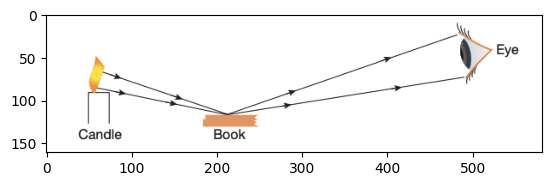


score : 0.3273084759712219
Light rays from a luminous object hitting a book and reflecting into an eye. Different materials absorb different amounts of light. Compare the sunlight striking snow and soil. The
snow absorbs very little light but the soil absorbs a lot. This means that most of the light hitting the snow is
reflected, but only a little of the light hitting the soil is reflected. The snow and soil have irregular surfaces,
so the reflected light leaves them in many different directions. Any ray that reflects so that it enters your eye
will help form an image of the snow or the dirt. Many more rays come from the snow, so it is very bright,
whereas the soil has absorbed a lot of the light, so it appears dark.
The book next to the candle is visible to us because some of the light that hits it reflects into our eyes,
which use that light to form an image of the book (shown in figure 20.6). This is how we see all nonluminous objects. This type of reflection, in which the directio

In [201]:
q = ['Travel of light']
get_top_k(ids, corpus, q)

## Hugging Face

In [ ]:
import json
import requests

API_URL = "https://api-inference.huggingface.co/models/sentence-transformers/msmarco-distilbert-base-tas-b"
headers = {"Authorization": f"Bearer {api_token}"}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

data = query(
    {
        "inputs": {
            "source_sentence": "That is a happy person",
            "sentences": [
                "That is a happy dog",
                "That is a very happy person",
                "Today is a sunny day"
            ]
        }
    }
## [0.853, 0.981, 0.655]